# Plotting with Scikit-NeuroMSI

This tutorial covers the basic pipeline for plotting the results of multisensory integration models using `Scikit-NeuroMSI`. We show how the plotting methods embedded in the `NDResult` and `NDResultCollection` objects.

> **Note**: In this tutorial we assume that you already have a basic knowledge of `matplotlib` for scientific computing.

## Visualization of model executions

### Visualization of unidimensional models

For simplicity, let's start our visualization exploration with the outputs of the model developed by Alais and Burr (2004), implemented in the `AlaisBurr2004` class. Let's run the model for equidistant auditory and visual locations: 

In [1]:
from skneuromsi.mle import AlaisBurr2004

model = AlaisBurr2004()
res = model.run(visual_position=-5, auditory_position=5)
res

<NDResult 'AlaisBurr2004', modes=['auditory' 'visual' 'multi'], times=1, positions=4000, positions_coordinates=1, causes=False>

The model outputs one `NDResult` object containing the results of both unisensory estimators and the multisensory estimator. To make sense of our results, let's visualise the output using its built-in `plot` method:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

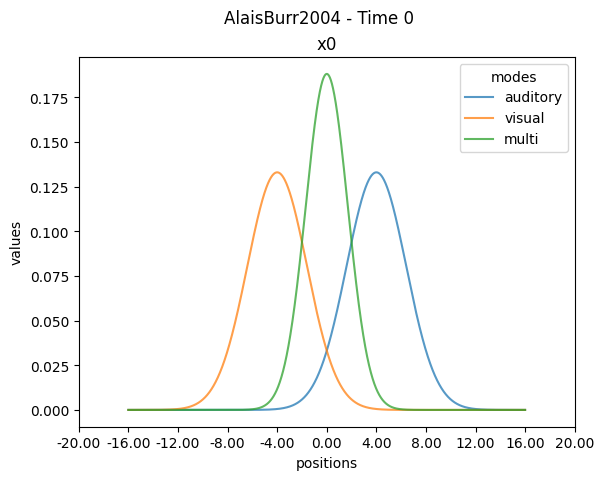

In [2]:
res.plot()

By the default the `plot` method provides useful information about the `NDRresult` object: the modalities (`modes`), model class executed, time points (by default here `Time 0`), spatial points (`positions`) and spatial dimensions (by default here `x0`). All these attributes are defined generically in the package so that they can accomodate to the wide array of multisensory integration models.

The default axis labels currently can be customized by the user using matplotlib methods. Here we rename the axis to be informative about the original experiment (Alais and Burr,2004) and remove information about the `NDResult` to simplify the visualization:

Text(0.5, 0.98, '')

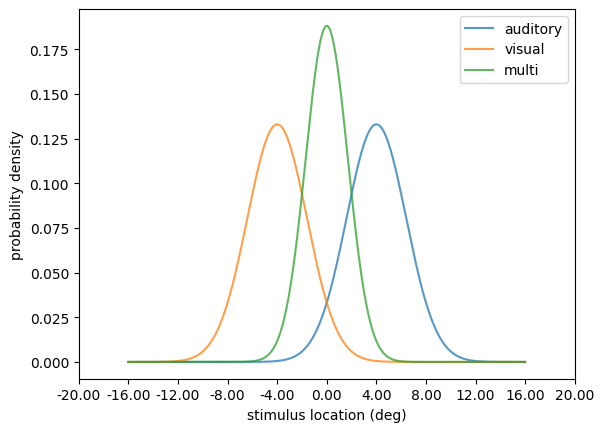

In [3]:
import matplotlib.pyplot as plt

ax1 = plt.subplot()
res.plot(ax=ax1)
ax1.set_ylabel("probability density")
ax1.set_xlabel("stimulus location (deg)")
ax1.set_title("")
ax1.legend(title="")
plt.suptitle("")

The plot shows how both auditory and visual estimates are combined into a single multisensory estimate. Now let's try a different configuration of the model run:

Text(0.5, 0.98, '')

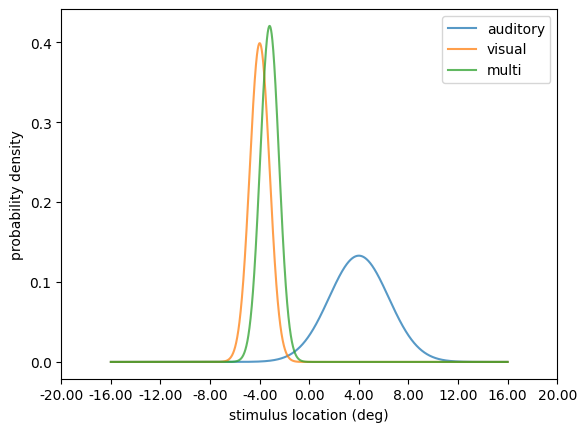

In [4]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=1, auditory_sigma=3
)

ax1 = plt.subplot()
alter_res.plot(ax=ax1)
ax1.set_ylabel("probability density")
ax1.set_xlabel("stimulus location (deg)")
ax1.set_title("")
ax1.legend(title="")
plt.suptitle("")

In this new configuration we increased the precision of the visual estimate. By doing so, the multisensory estimate of the stimulus location is dramatically biased towards the visual estimate. The opposite happens if we decrease the visual stimulus precision:

Text(0.5, 0.98, '')

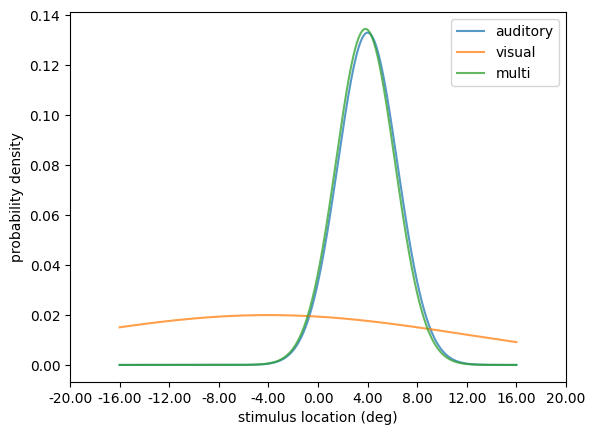

In [5]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=20, auditory_sigma=3
)

ax1 = plt.subplot()
alter_res.plot(ax=ax1)
ax1.set_ylabel("probability density")
ax1.set_xlabel("stimulus location (deg)")
ax1.set_title("")
ax1.legend(title="")
plt.suptitle("")

By manipulating the precision of the unisensory estimates you've explored computationally the principles of the MLE estimation behind the model. Refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/mle/_alais_burr2004.html) for further information about parameters to manipulate.

> This demonstration of the Alais and Burr model mechanics is inspired in the Computational Cognitive Neuroscience course materials developed by [Dr. Peggy Series](https://homepages.inf.ed.ac.uk/pseries/index.html) at The University of Edinburgh.  

### Visualization of models with multiple dimensions

Now let's visualize the output of a more complex model, such as those available in the `neural` module. Here we implement the network model developed by Cuppini et al. (2017) by importing the corresponding module and instantiating the `Cuppini2017` class, and run the model for two conflicting stimulus locations:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

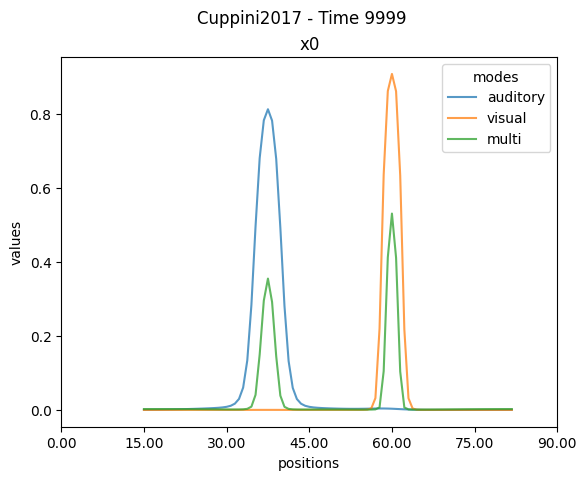

In [6]:
from skneuromsi.neural import Cuppini2017

model = Cuppini2017(neurons=90, position_range=(0, 90), 
                    time_range=(0,100), time_res=0.01)
res = model.run(auditory_position=30, visual_position=60)
res.plot()

>Notice how the plotting method now displays `Time 9999`. In the context of the specified `time_range ` and `time_res`, this means that the plot is displaying the last time point (i.e. 100 time units x 0.01 resolution). Here we are modeling 100 ms and the numerical integrator worked with a timestep of 0.01 ms.

Neural models are characterized for having spatial and temporal dimensions. By default the plotting function shows the most informative dimension (based on the values of each dimension). In this example, the plot showed the neural activity in the spatial domain, which is equivalent to explictly asking for it using the method  `plot.linep()`:

Text(0.5, 0.98, '')

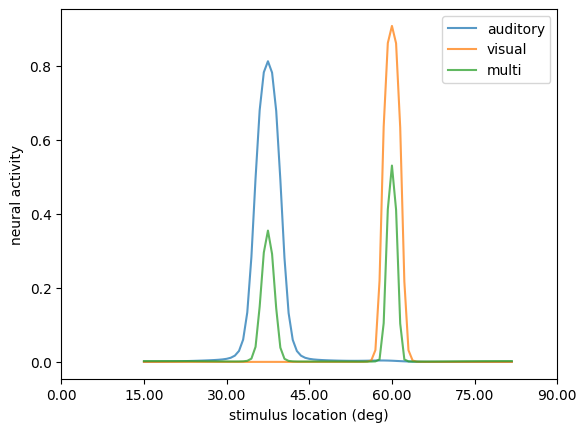

In [7]:
ax1 = plt.subplot()
res.plot.linep(ax=ax1)
ax1.set_ylabel("neural activity")
ax1.set_xlabel("stimulus location (deg)")
ax1.set_title("")
ax1.legend(title="")
plt.suptitle("")

Conversely, we can plot the neural activity in the temporal domain, using the method `plot.linet()`:

array([<Axes: title={'center': 'x0'}, xlabel='times', ylabel='values'>],
      dtype=object)

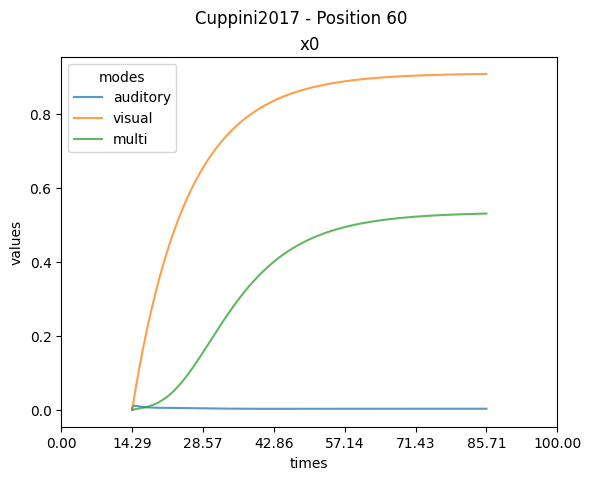

In [8]:
res.plot.linet()

By doing so we can observe how the neural activity changes during the simulation. Notice how the auditory activity remains flat. This occurs due to the plotting method automatically selecting `Position 60`, where the visual stimulus was presented. We can specify the desired spatial point to show with the `position` argument:

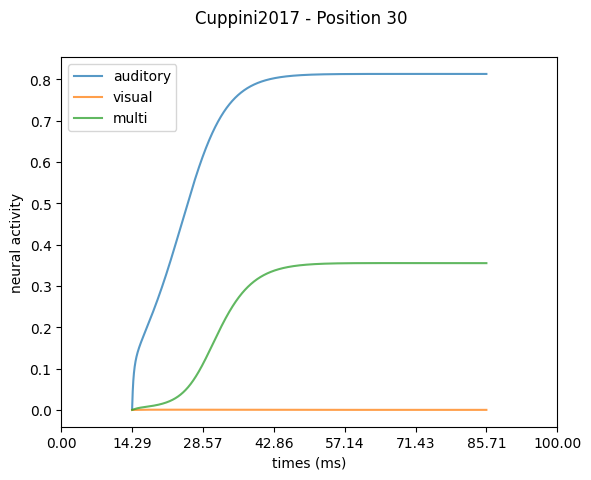

In [9]:
ax1 = plt.subplot()
res.plot.linet(position=30, ax=ax1)
ax1.set_ylabel("neural activity")
ax1.set_xlabel("times (ms)")
ax1.set_title("")
ax1.legend(title="")

Now let's see what happens if we reduce the distance of the stimuli:

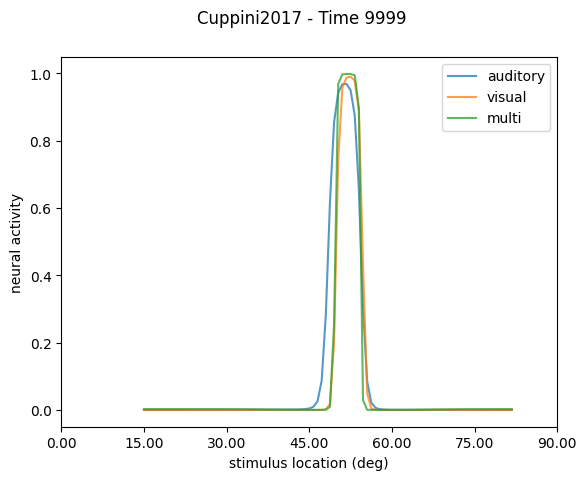

In [10]:
res = model.run(auditory_position=40, visual_position=50)

ax1 = plt.subplot()
res.plot.linep(ax=ax1)
ax1.set_ylabel("neural activity")
ax1.set_xlabel("stimulus location (deg)")
ax1.set_title("")
ax1.legend(title="")

The plotting method for spatial activity now shows the neural activity of all modalities being closer together at the timepoint with maximal activity (`Time 9999`).

Now let's explore the temporal activity of the model:

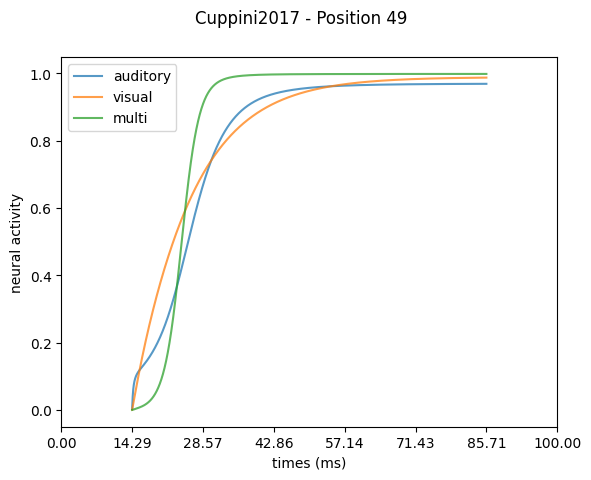

In [11]:
ax1 = plt.subplot()
res.plot.linet(ax=ax1)
ax1.set_ylabel("neural activity")
ax1.set_xlabel("times (ms)")
ax1.set_title("")
ax1.legend(title="")

The plotting method for temporal activity now shows the neural activity of all modalities evolving in time at the spatial point with maximal activity (`Position 49`).

Refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/core/ndresult/plot_acc.html) for more details about the visualizations available in the `NDResult` plotting module.

## Visualization of experiment simulations

We now show how to plot the results of experiment simulations computed with the `ParameterSweep` class. For this, we leverage the plotting module of the `NDResultCollection` object.

>**Note**: For an introduction of the experiment simulations classes and objects refer to the [Simulate experiments with Scikit-NeuroMSI](https://scikit-neuromsi.readthedocs.io/en/latest/simulate_experiments.html) tutorial.

Here we simulate the responses of the network model developed by Cuppini et al. (2017) on a spatial disparity paradigm:

In [12]:
from skneuromsi.sweep import ParameterSweep
from skneuromsi.neural import Cuppini2017
import numpy as np

## Model setup
model_cuppini2017 = Cuppini2017(neurons=90, position_range=(0, 90))

## Experiment setup
spatial_disparities = np.array([-24, -12, -6, -3, 3, 6, 12, 24])

sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
)

## Experiment run
res_sp_cuppini2017 = sp_cuppini2017.run(
    auditory_position=45, auditory_sigma=32, visual_sigma=4
)

res_sp_cuppini2017

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

<NDResultCollection 'ParameterSweep' len=8>

To make sense of our results, let's visualise the output of our experiment simluation using the built-in `plot` methods of the `NDResultCollection` object. These can be called directly from the object:

<Axes: xlabel='visual_position', ylabel='Proportion of unit causes'>

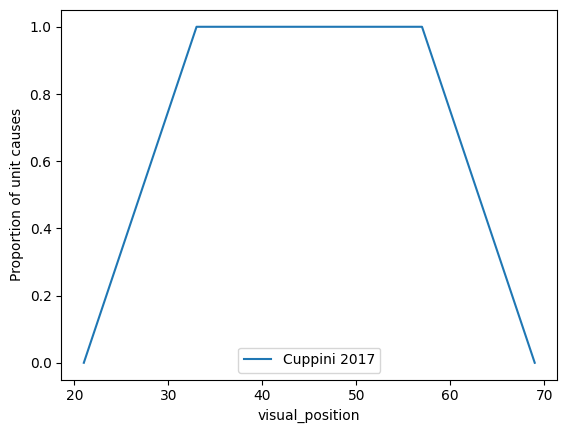

In [15]:
res_sp_cuppini2017.plot(label="Cuppini 2017")

By default the `plot` method outputs the `unity_report` plot available. We can specify the `kind` argument to select the specific plot we want to generate. Here we generate a `bias` plot out of the same experiment simulation:

<Axes: title={'center': 'Fixed=auditory_position, Target=visual_position\nMode=auditory, Dimension=times'}, xlabel='Disparity', ylabel='Bias'>

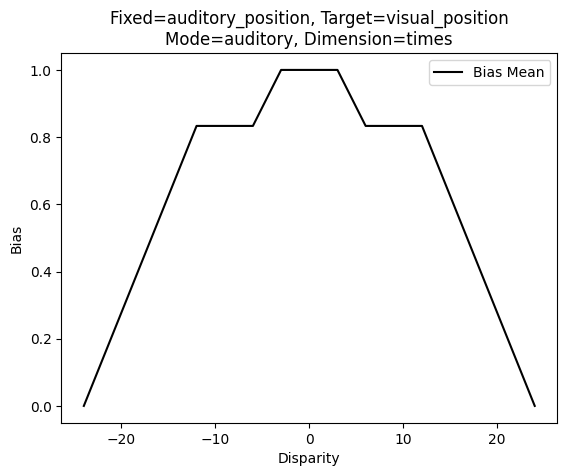

In [19]:
res_sp_cuppini2017.plot(kind="bias", influence_parameter="auditory_position", show_iterations=False)

The default `bias` plot provides useful information about the parameters that were considered for the cross-modal sensory bias computation.

We can also generate the plots out of the `bias` and `causes` methods of the `NDResultCollection` object. Here a customized plot from the `bias` method:

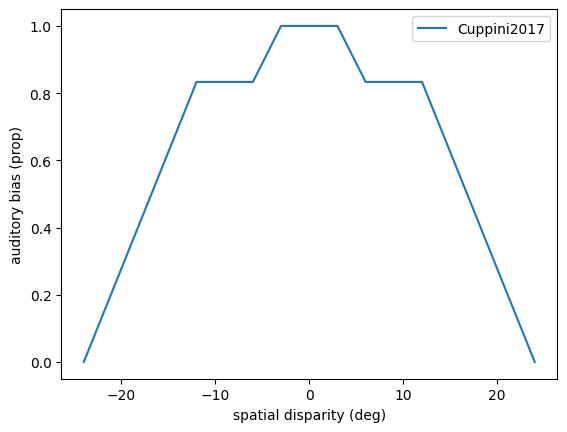

In [ ]:
ax1 = plt.subplot()
res_sp_cuppini2017.bias(influence_parameter="auditory_position", 
                        mode="auditory").plot(ax=ax1)
ax1.set_ylabel("auditory bias (prop)")
ax1.set_xlabel("spatial disparity (deg)")
ax1.legend(title="", labels=["Cuppini2017"])

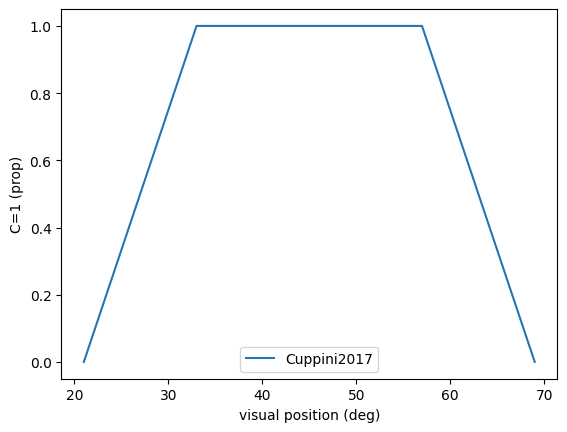

In [37]:
ax1 = plt.subplot()
res_sp_cuppini2017.causes().plot(ax=ax1)
ax1.set_ylabel("C=1 (prop)")
ax1.set_xlabel("visual position (deg)")
ax1.legend(labels=["Cuppini2017"])

Refer to the [API documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api/ndcollection/cplot_acc.html) for more details about the visualizations available in the `NDResultCollection` plotting module.